## インポート

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

| time | ラベル |
| - | - |
|0:00-0:10|表|
|0:10-0:20|表左下|
|0:20-0:35|表|
|0:35-0:40|縦|
|0:40-0:55|表|
|0:55-1:00|表右下|
|1:00-1:10|表|
|1:10-1:18|縦逆|
|1:18-1:25|表|
|1:25-1:35|裏|
|1:35-1:47|表|

## データの読み込み

In [110]:
# df初期化
df_label = pd.read_csv('data/label.csv', index_col='id')
print(df_label)

correct_label = [
    [0, 17,'表','green'],
    [17, 27, '表左下','blue'],
    [27, 41, '表','green'],
    [41, 48, '縦','yellow'],
    [48, 62, '表','green'],
    [62, 67, '表右下','orange'],
    [67, 77, '表','green'],
    [77, 84, '縦逆','brown'],
    [84, 93, '表','green'],
    [93, 102,'裏','black'],
    [102, 120,'表','green']
]

# 塗りつぶす関数
def fill_color(label):
    for i in range(len(label)):
        plt.axvspan(label[i][0], label[i][1], color=label[i][3], alpha=0.3)

    start  end label
id                  
1       0    9     表
2      10   19   表左下
3      20   34     表
4      35   39     縦
5      40   54     表
6      55   59   表右下
7      60   69     表
8      70   79    縦逆
9      80   84     表
10     85   94     裏
11     95  107     表


In [60]:
# CSVファイルからデータを読み込む
df_acc = pd.read_csv('data/acc.csv', index_col=0)
df_gyro = pd.read_csv('data/gyro.csv', index_col=0)
df_pre = pd.read_csv('data/pre.csv', index_col=0)

# ハイパスフィルターをかける 0.2 2秒分
df_acc['high_x'] = df_acc['x'].rolling(10).mean()
df_acc['high_y'] = df_acc['y'].rolling(10).mean()
df_acc['high_z'] = df_acc['z'].rolling(10).mean()

# ローパスフィルターをかける 10秒分
df_acc['low_x'] = df_acc['x'].rolling(50).median()
df_acc['low_y'] = df_acc['y'].rolling(50).median()
df_acc['low_z'] = df_acc['z'].rolling(50).median()

# ハイパスフィルターをかける 0.2 2秒分
df_gyro['high_x'] = df_gyro['x'].rolling(10).mean()
df_gyro['high_y'] = df_gyro['y'].rolling(10).mean()
df_gyro['high_z'] = df_gyro['z'].rolling(10).mean()

# ローパスフィルターをかける 10秒分
df_gyro['low_x'] = df_gyro['x'].rolling(50).median()
df_gyro['low_y'] = df_gyro['y'].rolling(50).median()
df_gyro['low_z'] = df_gyro['z'].rolling(50).median()

# ハイパスフィルターをかける 0.3 2秒分
df_pre['high_p'] = df_pre['p'].rolling(10).mean()

# ローパスフィルターをかける 10秒分
df_pre['low_p'] = df_pre['p'].rolling(50).median()

## プロット

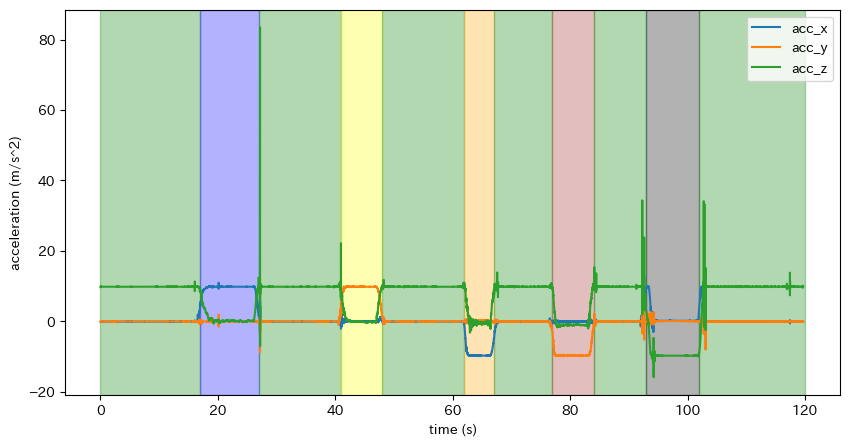

In [111]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_acc.index, df_acc['x'], label='acc_x')
plt.plot(df_acc.index, df_acc['y'], label='acc_y')
plt.plot(df_acc.index, df_acc['z'], label='acc_z')
# plt.plot(df.index, df['Absolute'], label='acc_Absolute')

# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

# 凡例を表示
plt.legend()

fill_color(correct_label)

# グラフを表示
plt.show()


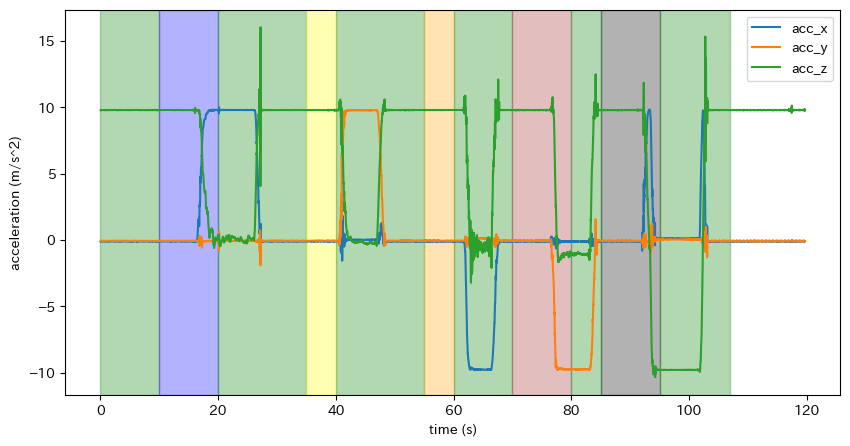

In [57]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_acc.index, df_acc['high_x'], label='acc_x')
plt.plot(df_acc.index, df_acc['high_y'], label='acc_y')
plt.plot(df_acc.index, df_acc['high_z'], label='acc_z')
# plt.plot(df.index, df['Absolute'], label='acc_Absolute')

# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

# 凡例を表示
plt.legend()

fill_color()

# グラフを表示
plt.show()


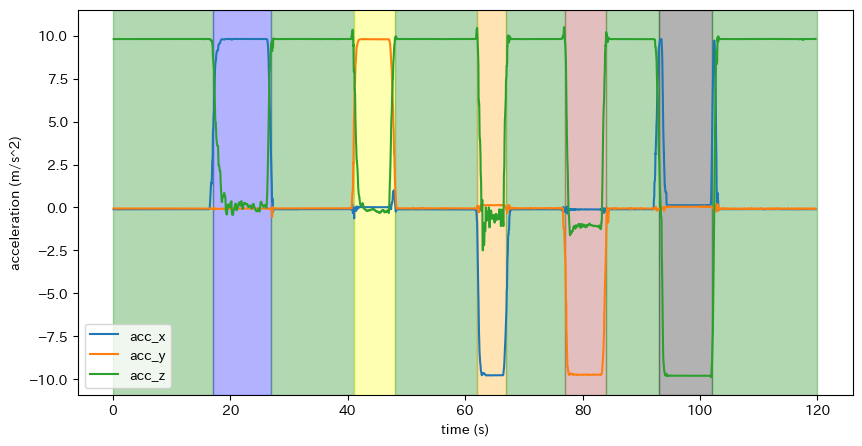

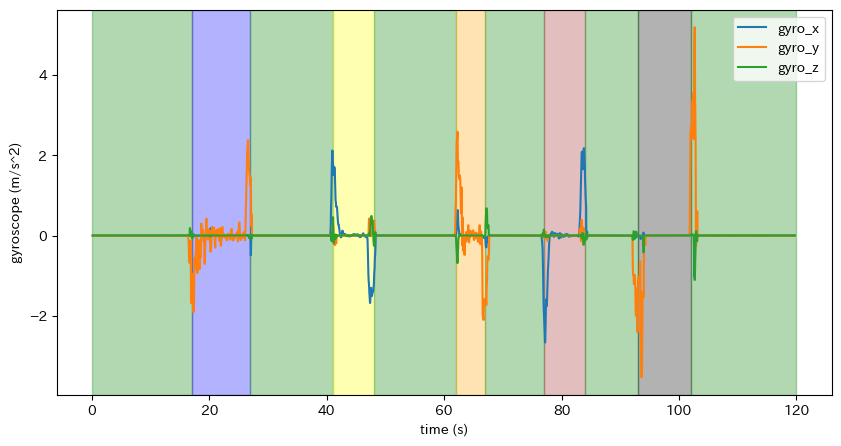

In [114]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_acc.index, df_acc['low_x'], label='acc_x')
plt.plot(df_acc.index, df_acc['low_y'], label='acc_y')
plt.plot(df_acc.index, df_acc['low_z'], label='acc_z')

# plt.plot(df_pre.index, df_pre['low_p'], label='pre_x')


# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

# 凡例を表示
plt.legend()

fill_color(correct_label)

# グラフを表示
plt.show()


# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_gyro.index, df_gyro['low_x'], label='gyro_x')
plt.plot(df_gyro.index, df_gyro['low_y'], label='gyro_y')
plt.plot(df_gyro.index, df_gyro['low_z'], label='gyro_z')

# plt.plot(df_pre.index, df_pre['low_p'], label='pre_x')


# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('gyroscope (m/s^2)')

# 凡例を表示
plt.legend()

fill_color(correct_label)

# グラフを表示
plt.show()
